In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re

In [3]:
os.getcwd()

'C:\\Users\\IN0202'

In [8]:
os.chdir(r"D:\Personal\Analytics course\IPBA\Case Study\hundred")
path=r"D:\Personal\Analytics course\IPBA\Case Study\hundred"

In [9]:
os.getcwd()

'D:\\Personal\\Analytics course\\IPBA\\Case Study\\hundred'

In [15]:
from os import listdir
filepaths = [f for f in listdir(path) if f.startswith('Stock')]
print(filepaths)

['Stock_ABBOTINDIA.xlsx', 'Stock_ACC.xlsx', 'Stock_ADANIPORTS.xlsx', 'Stock_ADANITRANS.xlsx', 'Stock_AMBUJACEM.xlsx', 'Stock_ASIANPAINT.xlsx', 'Stock_AUROPHARMA.xlsx', 'Stock_AXISBANK.xlsx', 'Stock_BAJAJ-AUTO.xlsx', 'Stock_BAJAJFINSV.xlsx', 'Stock_BAJAJHLDNG.xlsx', 'Stock_BAJFINANCE.xlsx', 'Stock_BANDHANBNK.xlsx', 'Stock_BANKBARODA.xlsx', 'Stock_BERGEPAINT.xlsx', 'Stock_BHARTIARTL.xlsx', 'Stock_BIOCON.xlsx', 'Stock_BOSCHLTD.xlsx', 'Stock_BPCL.xlsx', 'Stock_BRITANNIA.xlsx', 'Stock_CADILAHC.xlsx', 'Stock_CIPLA.xlsx', 'Stock_COALINDIA.xlsx', 'Stock_COLPAL.xlsx', 'Stock_CONCOR.xlsx', 'Stock_DABUR.xlsx', 'Stock_DIVISLAB.xlsx', 'Stock_DLF.xlsx', 'Stock_DMART.xlsx', 'Stock_DRREDDY.xlsx', 'Stock_EICHERMOT.xlsx', 'Stock_GAIL.xlsx', 'Stock_GICRE.xlsx', 'Stock_GODREJCP.xlsx', 'Stock_GRASIM.xlsx', 'Stock_HAVELLS.xlsx', 'Stock_HCLTECH.xlsx', 'Stock_HDFC.xlsx', 'Stock_HDFCAMC.xlsx', 'Stock_HDFCBANK.xlsx', 'Stock_HDFCLIFE.xlsx', 'Stock_HEROMOTOCO.xlsx', 'Stock_HINDALCO.xlsx', 'Stock_HINDPETRO.xlsx', 

In [91]:
# raw_data = pd.read_excel("NSE 2018 data.xlsx")
raw_data= pd.concat(map(pd.read_excel, filepaths))

In [92]:
raw_data.tail(10)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
2661,2020-09-18,ZEEL,EQ,221.10,223.40,226.65,219.20,219.75,220.30,223.08,24883313,5.551078e+14,132427.0,3851022,0.1548
2662,2020-09-21,ZEEL,EQ,220.30,221.75,224.80,204.35,210.50,210.70,215.91,29829634,6.440420e+14,206994.0,4525180,0.1517
2663,2020-09-22,ZEEL,EQ,210.70,212.35,212.35,193.35,196.70,197.10,200.46,54161525,1.085714e+15,261401.0,9690771,0.1789
2664,2020-09-23,ZEEL,EQ,197.10,200.10,203.05,177.40,190.70,191.80,189.96,65002964,1.234826e+15,348096.0,8663237,0.1333
2665,2020-09-24,ZEEL,EQ,191.80,185.00,195.80,182.85,193.50,190.35,190.14,76316695,1.451102e+15,279397.0,24361908,0.3192
2666,2020-09-25,ZEEL,EQ,190.35,197.55,201.50,183.20,197.30,198.20,192.54,61557172,1.185250e+15,301334.0,6573633,0.1068
2667,2020-09-28,ZEEL,EQ,198.20,198.75,209.75,197.20,207.60,208.75,205.11,34075363,6.989202e+14,171300.0,4578621,0.1344
2668,2020-09-29,ZEEL,EQ,208.75,210.00,214.60,204.30,208.55,207.80,209.57,45045743,9.440054e+14,197076.0,6072005,0.1348
2669,2020-09-30,ZEEL,EQ,207.80,209.00,213.00,206.15,210.00,208.90,209.94,31203625,6.550914e+14,134228.0,8507629,0.2726
2670,2020-10-01,ZEEL,EQ,208.90,211.00,215.00,210.50,214.70,214.00,213.33,19070023,4.068192e+14,95790.0,2804067,0.1470


In [93]:
raw_data.shape

(244901, 15)

In [94]:
raw_data.isnull().sum()

Date                      0
Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                30684
Deliverable Volume        0
%Deliverble               0
dtype: int64

In [95]:
# to calculate the simple moving average - 5, 10 , 50, 100, 200 days
raw_data['SMA-5'] = raw_data.groupby('Symbol')['Close'].transform(lambda x:x.rolling(window=5).mean())
raw_data['SMA-10'] = raw_data.groupby('Symbol')['Close'].transform(lambda x:x.rolling(window=10).mean())
raw_data['SMA-50'] = raw_data.groupby('Symbol')['Close'].transform(lambda x:x.rolling(window=50).mean())
raw_data['SMA-100'] = raw_data.groupby('Symbol')['Close'].transform(lambda x:x.rolling(window=100).mean())
raw_data['SMA-200'] = raw_data.groupby('Symbol')['Close'].transform(lambda x:x.rolling(window=200).mean())

In [96]:
# to calculate the exponential moving average - 5, 10 , 50, 100, 200 days
raw_data['EMA-5'] = raw_data.groupby('Symbol')['Close'].transform(lambda x:x.ewm(span=5).mean())
raw_data['EMA-10'] = raw_data.groupby('Symbol')['Close'].transform(lambda x:x.ewm(span=10).mean())
raw_data['EMA-50'] = raw_data.groupby('Symbol')['Close'].transform(lambda x:x.ewm(span=50).mean())
raw_data['EMA-100'] = raw_data.groupby('Symbol')['Close'].transform(lambda x:x.ewm(span=100).mean())
raw_data['EMA-200'] = raw_data.groupby('Symbol')['Close'].transform(lambda x:x.ewm(span=200).mean())

In [97]:
raw_data.head(50)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,SMA-5,SMA-10,SMA-50,SMA-100,SMA-200,EMA-5,EMA-10,EMA-50,EMA-100,EMA-200
0,2010-01-08,ABBOTINDIA,EQ,783.75,755.00,807.00,755.00,807.00,807.00,784.12,...,NaN,NaN,NaN,NaN,NaN,807.000000,807.000000,807.000000,807.000000,807.000000
1,2010-01-11,ABBOTINDIA,EQ,807.00,825.00,825.00,790.00,804.80,804.80,793.90,...,NaN,NaN,NaN,NaN,NaN,805.680000,805.790000,805.878000,805.889000,805.894500
2,2010-01-12,ABBOTINDIA,EQ,804.80,800.00,805.00,790.00,790.00,790.00,799.36,...,NaN,NaN,NaN,NaN,NaN,798.252632,799.442525,800.372244,800.486390,800.543264
3,2010-01-13,ABBOTINDIA,EQ,790.00,787.00,787.00,720.00,767.00,767.00,758.53,...,NaN,NaN,NaN,NaN,NaN,785.270769,788.754158,791.522061,791.861988,792.031243
4,2010-01-14,ABBOTINDIA,EQ,767.00,769.00,798.00,769.00,785.10,785.10,791.73,...,790.78,NaN,NaN,NaN,NaN,785.205213,787.705149,790.132883,790.454959,790.617132
5,2010-01-15,ABBOTINDIA,EQ,785.10,768.50,805.00,768.50,798.70,797.05,798.21,...,788.79,NaN,NaN,NaN,NaN,789.533459,790.132330,791.404031,791.609816,791.716258
6,2010-01-18,ABBOTINDIA,EQ,797.05,808.00,808.00,791.00,800.00,799.55,800.12,...,787.74,NaN,NaN,NaN,NaN,793.079869,792.401610,792.711941,792.813309,792.869215
7,2010-01-19,ABBOTINDIA,EQ,799.55,804.00,805.00,791.50,791.50,792.40,802.60,...,788.22,NaN,NaN,NaN,NaN,792.844044,792.401244,792.667276,792.757958,792.808490
8,2010-01-20,ABBOTINDIA,EQ,792.40,800.90,800.90,783.25,787.55,786.45,793.07,...,792.11,NaN,NaN,NaN,NaN,790.655774,791.106461,791.860896,791.999708,792.073403
9,2010-01-21,ABBOTINDIA,EQ,786.45,751.00,800.00,751.00,784.00,780.00,779.69,...,791.09,790.935,NaN,NaN,NaN,787.041167,788.773481,790.450186,790.688891,790.811012


In [110]:
raw_data.isnull().sum()

Date                      0
Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                30684
Deliverable Volume        0
%Deliverble               0
SMA-5                   424
SMA-10                  954
SMA-50                 5194
SMA-100               10494
SMA-200               21020
EMA-5                     0
EMA-10                    0
EMA-50                    0
EMA-100                   0
EMA-200                   0
dtype: int64

In [111]:
raw_data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,SMA-5,SMA-10,SMA-50,SMA-100,SMA-200,EMA-5,EMA-10,EMA-50,EMA-100,EMA-200
0,2010-01-08,ABBOTINDIA,EQ,783.75,755.00,807.00,755.00,807.00,807.00,784.12,...,NaN,NaN,NaN,NaN,NaN,807.000000,807.000000,807.000000,807.000000,807.000000
1,2010-01-11,ABBOTINDIA,EQ,807.00,825.00,825.00,790.00,804.80,804.80,793.90,...,NaN,NaN,NaN,NaN,NaN,805.680000,805.790000,805.878000,805.889000,805.894500
2,2010-01-12,ABBOTINDIA,EQ,804.80,800.00,805.00,790.00,790.00,790.00,799.36,...,NaN,NaN,NaN,NaN,NaN,798.252632,799.442525,800.372244,800.486390,800.543264
3,2010-01-13,ABBOTINDIA,EQ,790.00,787.00,787.00,720.00,767.00,767.00,758.53,...,NaN,NaN,NaN,NaN,NaN,785.270769,788.754158,791.522061,791.861988,792.031243
4,2010-01-14,ABBOTINDIA,EQ,767.00,769.00,798.00,769.00,785.10,785.10,791.73,...,790.78,NaN,NaN,NaN,NaN,785.205213,787.705149,790.132883,790.454959,790.617132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,2020-09-25,ZEEL,EQ,190.35,197.55,201.50,183.20,197.30,198.20,192.54,...,197.63,207.905,184.363,178.3200,199.09725,198.979075,204.265870,193.784020,188.921231,209.342376
2667,2020-09-28,ZEEL,EQ,198.20,198.75,209.75,197.20,207.60,208.75,205.11,...,197.24,207.160,185.443,178.9010,198.72375,202.236050,205.081167,194.370921,189.313880,209.336481
2668,2020-09-29,ZEEL,EQ,208.75,210.00,214.60,204.30,208.55,207.80,209.57,...,199.38,206.195,186.524,179.4250,198.34125,204.090700,205.575500,194.897552,189.679942,209.321193
2669,2020-09-30,ZEEL,EQ,207.80,209.00,213.00,206.15,210.00,208.90,209.94,...,202.80,205.500,187.562,179.9635,197.98725,205.693800,206.179954,195.446667,190.060537,209.317002


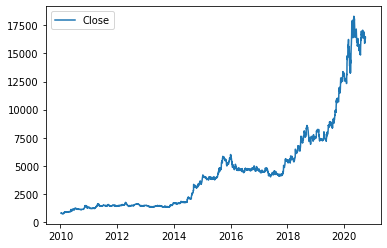

In [150]:
plt.plot(AbbotIndia.Date, AbbotIndia['Close'], label='Close')
#plt.plot(AbbotIndia.Date, AbbotIndia['SMA-5'], label='SMA-5', color='green')
#plt.plot(AbbotIndia.Date, AbbotIndia['EMA-5'], label='EMA-5', color='red')
plt.legend(loc='upper left')
plt.show()

In [134]:
raw_data['SMA-5']

0          NaN
1          NaN
2          NaN
3          NaN
4       790.78
         ...  
2666    197.63
2667    197.24
2668    199.38
2669    202.80
2670    207.53
Name: SMA-5, Length: 244901, dtype: float64

In [143]:
AbbotIndia = raw_data[raw_data.Symbol == "ABBOTINDIA"]
print(AbbotIndia)

           Date      Symbol Series  Prev Close      Open      High       Low  \
0    2010-01-08  ABBOTINDIA     EQ      783.75    755.00    807.00    755.00   
1    2010-01-11  ABBOTINDIA     EQ      807.00    825.00    825.00    790.00   
2    2010-01-12  ABBOTINDIA     EQ      804.80    800.00    805.00    790.00   
3    2010-01-13  ABBOTINDIA     EQ      790.00    787.00    787.00    720.00   
4    2010-01-14  ABBOTINDIA     EQ      767.00    769.00    798.00    769.00   
...         ...         ...    ...         ...       ...       ...       ...   
2662 2020-09-25  ABBOTINDIA     EQ    15982.90  15950.00  16441.00  15950.00   
2663 2020-09-28  ABBOTINDIA     EQ    16237.75  16315.15  16499.95  16168.00   
2664 2020-09-29  ABBOTINDIA     EQ    16318.20  16443.65  16510.10  16111.60   
2665 2020-09-30  ABBOTINDIA     EQ    16402.00  16365.00  16500.00  16235.35   
2666 2020-10-01  ABBOTINDIA     EQ    16486.95  16470.00  16595.00  16325.00   

          Last     Close      VWAP  ...

In [156]:
from datetime import datetime
mydate = AbbotIndia['Date'].dt.year
print(mydate)
AbbotIndia[mydate == 2020]

0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
2662    2020
2663    2020
2664    2020
2665    2020
2666    2020
Name: Date, Length: 2667, dtype: int64


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,SMA-5,SMA-10,SMA-50,SMA-100,SMA-200,EMA-5,EMA-10,EMA-50,EMA-100,EMA-200
2477,2020-01-01,ABBOTINDIA,EQ,13075.50,13170.60,13452.15,13080.00,13119.95,13140.00,13199.96,...,13137.31,13130.705,12425.379,11134.0735,9539.43600,13129.490574,13102.354717,12369.220211,11405.786264,10170.908695
2478,2020-01-02,ABBOTINDIA,EQ,13140.00,13119.95,13314.90,13119.95,13127.00,13139.90,13194.30,...,13149.28,13125.605,12474.180,11180.4795,9568.73225,13132.960383,13109.181132,12399.442947,11440.125150,10200.450897
2479,2020-01-03,ABBOTINDIA,EQ,13139.90,13170.00,13274.20,13150.00,13190.00,13248.25,13211.40,...,13160.08,13126.415,12520.860,11229.1910,9598.15425,13171.390255,13134.466381,12432.729498,11475.929602,10230.777256
2480,2020-01-06,ABBOTINDIA,EQ,13248.25,13230.40,13230.40,12720.00,12887.90,12780.30,12928.33,...,13076.79,13105.980,12554.225,11272.6085,9625.07050,13041.026837,13070.072493,12446.359714,11501.758719,10256.145641
2481,2020-01-07,ABBOTINDIA,EQ,12780.30,12881.10,13074.95,12657.00,12749.85,12742.90,12806.95,...,13010.27,13061.395,12580.938,11314.3050,9652.00775,12941.651225,13010.586585,12457.988745,11526.335774,10280.889466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662,2020-09-25,ABBOTINDIA,EQ,15982.90,15950.00,16441.00,15950.00,16180.00,16237.75,16179.05,...,16008.45,16292.655,16243.973,16279.0280,15405.09975,16133.739318,16238.664865,16317.747762,16069.109451,15072.847257
2663,2020-09-28,ABBOTINDIA,EQ,16237.75,16315.15,16499.95,16168.00,16350.00,16318.20,16380.04,...,16094.06,16272.860,16265.701,16265.1625,15423.91875,16195.226212,16253.125799,16317.765497,16074.041937,15085.238827
2664,2020-09-29,ABBOTINDIA,EQ,16318.20,16443.65,16510.10,16111.60,16315.25,16402.00,16353.03,...,16185.84,16223.500,16293.445,16250.1045,15441.90450,16264.150808,16280.193835,16321.068810,16080.536156,15098.340928
2665,2020-09-30,ABBOTINDIA,EQ,16402.00,16365.00,16500.00,16235.35,16498.00,16486.95,16444.31,...,16285.56,16219.685,16324.435,16234.1550,15459.42850,16338.417205,16317.785865,16327.573955,16088.583955,15112.157934
